# **Libraries**

In [27]:
# import library
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# **Importation des données**  

In [2]:
# Ajustez le chemin selon l'emplacement réel de votre fichier
data = pd.read_csv("guillaume.txt", sep=";")

C:\Windows\Temp\ipykernel_24452\2242209508.py:2: DtypeWarning: Columns (1,2,5,6,7,8,9,15,16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("guillaume.txt", sep=";")


# **Traitement de données**

In [3]:
def nettoyer_colonnes_par_indices(data, indices_colonnes):
    """
    Nettoie plusieurs colonnes spécifiées par leurs indices en supprimant les espaces,
    convertissant les valeurs en numérique, supprimant les valeurs non valides,
    et en les convertissant en entiers.

    Args:
        data (pd.DataFrame): Le DataFrame à traiter.
        indices_colonnes (list): Liste des indices des colonnes à nettoyer.

    Returns:
        pd.DataFrame: Le DataFrame avec les colonnes nettoyées.
    """
    # Parcourir les indices des colonnes
    for indice in indices_colonnes:
        # Obtenir le nom de la colonne depuis l'indice
        colonne = data.columns[indice]

        # Supprimer les espaces
        data[colonne] = data[colonne].astype(str).str.strip()
        # Convertir en numérique (remplace les erreurs par NaN)
        data[colonne] = pd.to_numeric(data[colonne], errors='coerce')
        # Supprimer les lignes avec des NaN dans la colonne
        data = data.dropna(subset=[colonne])
        # Convertir les valeurs en entiers
        data[colonne] = data[colonne].astype(int)

    return data

In [4]:
# Liste des indices des colonnes à nettoyer
indices_colonnes = [1,2,5,6,7,8,9,15,16,22]

# Nettoyage des colonnes
data = nettoyer_colonnes_par_indices(data, indices_colonnes)

C:\Windows\Temp\ipykernel_24452\3867840830.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colonne] = data[colonne].astype(int)
C:\Windows\Temp\ipykernel_24452\3867840830.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colonne] = data[colonne].astype(str).str.strip()
C:\Windows\Temp\ipykernel_24452\3867840830.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [5]:
# verifier les types de mes données
data.dtypes

ZIBZIN                      object
IDAvisAutorisationCheque     int32
FlagImpaye                   int32
Montant                     object
DateTransaction             object
CodeDecision                 int32
VerifianceCPT1               int32
VerifianceCPT2               int32
VerifianceCPT3               int32
D2CB                         int32
ScoringFP1                  object
ScoringFP2                  object
ScoringFP3                  object
TauxImpNb_RB                object
TauxImpNB_CPM               object
EcartNumCheq                 int32
NbrMagasin3J                 int32
DiffDateTr1                 object
DiffDateTr2                 object
DiffDateTr3                 object
CA3TRetMtt                  object
CA3TR                       object
Heure                        int32
dtype: object

In [6]:
col_flot = ["Montant", "TauxImpNb_RB","TauxImpNB_CPM", "CA3TRetMtt", "CA3TR","ScoringFP1", 	"ScoringFP2", 	"ScoringFP3"]
col_str = ["ZIBZIN","IDAvisAutorisationCheque"]
co_date = ["DateTransaction"]
col_heure = ["Heure"]
# recuperer toutes les colonnnes qui ne foont pas parti de col_flot, col_str, col_heure, col_date dans col_int
col_int = [col for col in data.columns if col not in col_flot and col not in col_str and col not in col_heure and col not in co_date]
# afficher le nombre de chacune des liste
print("col_flot :", len(col_flot))
print("col_str :", len(col_str))
print("col_int :", len(col_int))
print("co_date :", len(co_date))
print("col_heure :", len(col_heure))

col_flot : 8
col_str : 2
col_int : 11
co_date : 1
col_heure : 1


In [7]:
for col in col_flot:
    # Remplacer les virgules par des points dans les colonnes de type string
    data[col] = data[col].astype(str).str.replace(',', '.', regex=False)

    # Convertir les colonnes au type float
    data[col] = data[col].astype(float)

In [8]:
# Convertir en int
for col in col_int:
    # Vérifier si la colonne n'est pas déjà de type int
    if data[col].dtype != 'int64':
        # Remplacer les virgules par des points, si nécessaire
        data[col] = data[col].astype(str).str.replace(',', '.')
        # Convertir en type float puis en int (pour éviter les problèmes avec les décimales)
        data[col] = data[col].astype(float).astype(int)

In [9]:
# convertir la col_date en type date
data['DateTransaction'] = pd.to_datetime(data['DateTransaction'])


In [10]:
# Conversion des secondes depuis minuit en format timedelta
data['Heure'] = pd.to_timedelta(data['Heure'], unit='s')

# Convertir en format HH:MM:SS en chaîne (ou datetime.time si nécessaire)
data['Heure'] = data['Heure'].apply(lambda x: (pd.Timestamp("00:00:00") + x).time())

# **Analyse Exploratoire des Données**

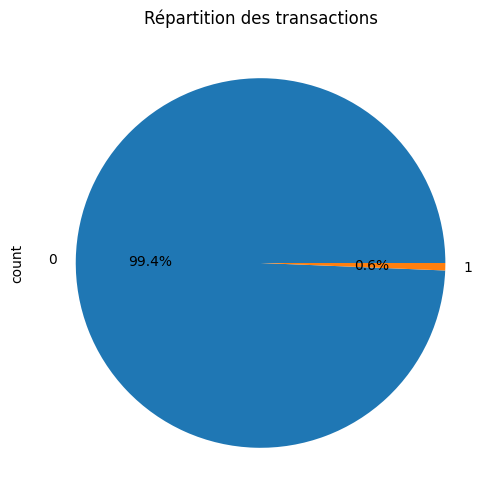

In [11]:
# liste des elements en flagImpaye
data['FlagImpaye'].value_counts()

# Graphique des transactions circulaires flagImpaye
plt.figure(figsize=(6, 6))
data['FlagImpaye'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Répartition des transactions')
plt.show()

In [13]:
# selectionner toutes les colonnes sauf DateTransaction et Heure
NUMERIC_FEATURES = [col for col in data.columns if col not in ['DateTransaction', 'Heure','ZIBZIN','IDAvisAutorisationCheque']]

C:\Windows\Temp\ipykernel_24452\1680255934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_refuse['JourSemaine'] = data_refuse['DateTransaction'].dt.day_name()
C:\Windows\Temp\ipykernel_24452\1680255934.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_refuse['Mois'] = data_refuse['DateTransaction'].dt.strftime('%b')  # Nom abrégé du mois


<Figure size 1200x600 with 0 Axes>

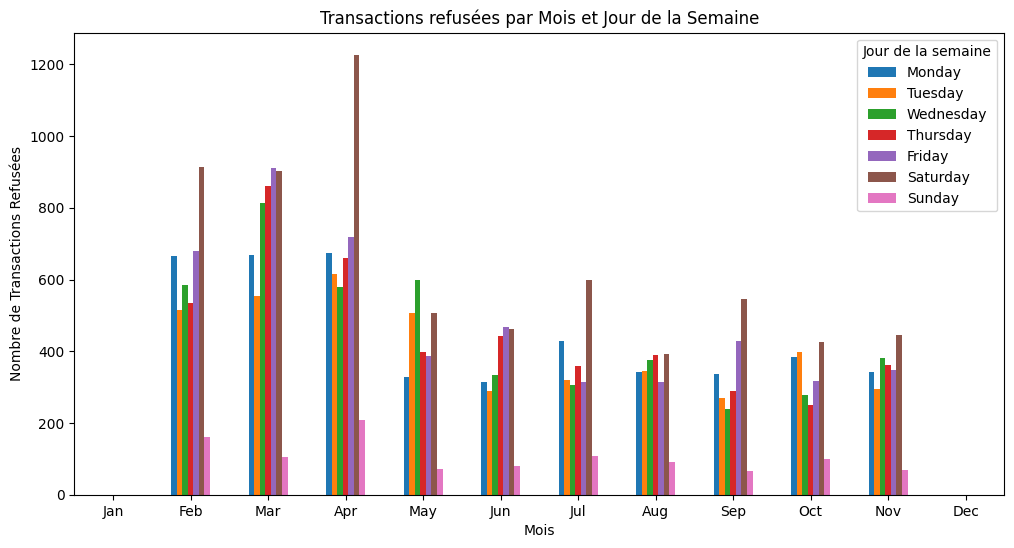

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrer les transactions refusées
data_refuse = data[data['FlagImpaye'] == 1]

# Extraire le jour de la semaine et le mois
data_refuse['JourSemaine'] = data_refuse['DateTransaction'].dt.day_name()
data_refuse['Mois'] = data_refuse['DateTransaction'].dt.strftime('%b')  # Nom abrégé du mois

# Grouper par mois et jour de la semaine et compter les transactions refusées
grouped_data = data_refuse.groupby(['Mois', 'JourSemaine']).size().unstack()

# Ordonner les mois et les jours de la semaine
mois_ord = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
jours_ord = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Réorganiser les données selon l'ordre voulu
grouped_data = grouped_data.reindex(mois_ord, axis=0)
grouped_data = grouped_data[jours_ord]

# Création du graphique en barres groupées
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', figsize=(12, 6), rot=0)

# Ajouter des labels et un titre
plt.title('Transactions refusées par Mois et Jour de la Semaine')
plt.xlabel('Mois')
plt.ylabel('Nombre de Transactions Refusées')
plt.legend(title='Jour de la semaine')

# Afficher le graphique
plt.show()


C:\Windows\Temp\ipykernel_24452\3526915898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FlagImpaye', y='Montant', data=data, palette=['#2E86C1', '#E74C3C'])  # Bleu pour 0, Rouge pour 1


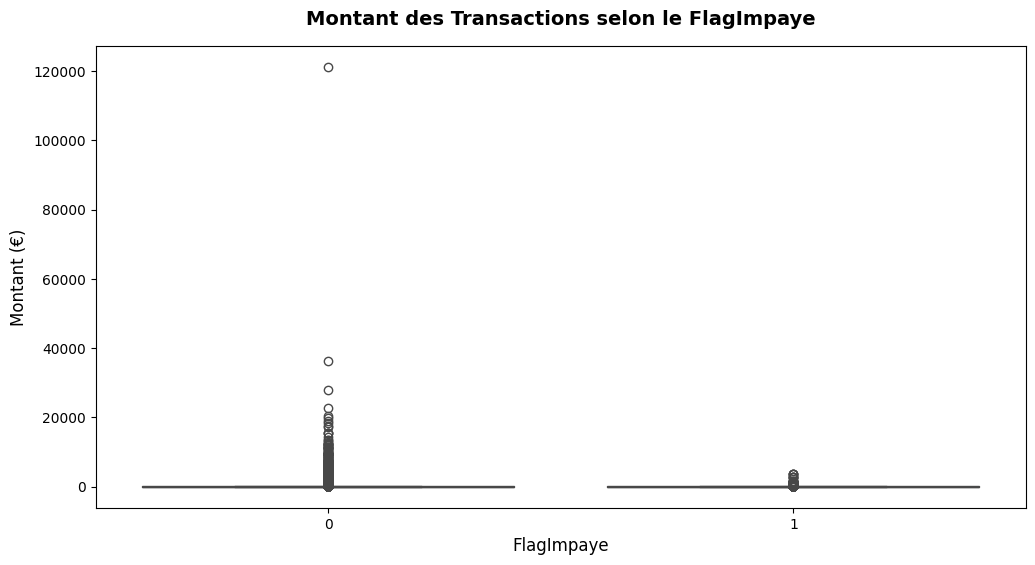

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du boxplot avec une palette de couleurs améliorée
plt.figure(figsize=(12, 6))
sns.boxplot(x='FlagImpaye', y='Montant', data=data, palette=['#2E86C1', '#E74C3C'])  # Bleu pour 0, Rouge pour 1

# Ajout du titre et des labels
plt.title('Montant des Transactions selon le FlagImpaye', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('FlagImpaye', fontsize=12)
plt.ylabel('Montant (€)', fontsize=12)

# Affichage du graphique
plt.show()


C:\Windows\Temp\ipykernel_24452\1116797991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_refuse['JourSemaine'] = data_refuse['DateTransaction'].dt.day_name()


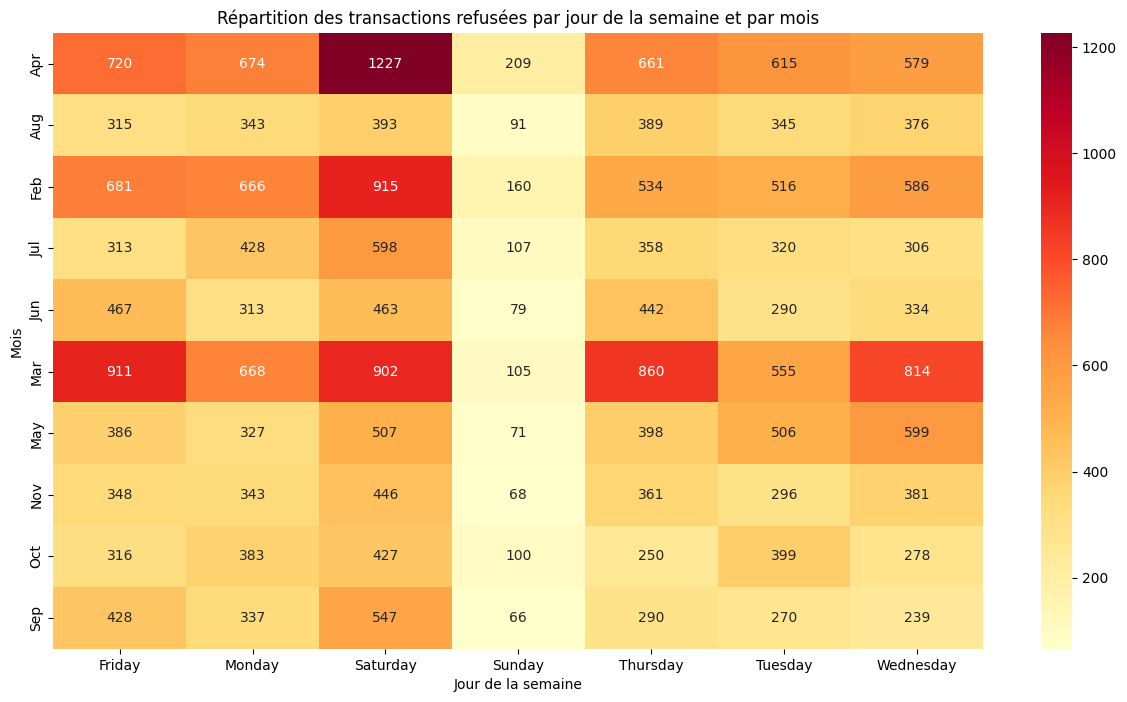

In [16]:
# Ajoutons le jour de la semaine
data_refuse['JourSemaine'] = data_refuse['DateTransaction'].dt.day_name()

# Analyse croisée : jour de la semaine par mois
plt.figure(figsize=(15, 8))
cross_tab = pd.crosstab(data_refuse['Mois'], data_refuse['JourSemaine'])
sns.heatmap(cross_tab, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Répartition des transactions refusées par jour de la semaine et par mois')
plt.xlabel('Jour de la semaine')
plt.ylabel('Mois')
plt.show()


In [17]:
# distrubution des transactions selon flagImpaye, calcul le pourcentage de chaque valeur
data['FlagImpaye'].value_counts(normalize=True) * 100

# Nombre et pourcentage de transactions de chaque classe
nombre_transactions = data['FlagImpaye'].value_counts()
pourcentage_transactions = data['FlagImpaye'].value_counts(normalize=True) * 100
#afficher le nombre et le pourcentage dans un tableau
pd.DataFrame({'Nombre de transactions': nombre_transactions, 'Pourcentage de transactions (%)': pourcentage_transactions})






,Nombre de transactions,Pourcentage de transactions (%)
FlagImpaye,,
0,4616778,99.354498
1,29995,0.645502


# **Partie 2**

### **Séparation des features et la cible**


In [18]:
# Définir les plages de dates pour l'apprentissage et le test
train_start_date = "2017-02-01"
train_end_date = "2017-08-31"
test_start_date = "2017-09-01"
test_end_date = "2017-11-30"

In [24]:
# Définir les plages de dates pour l'apprentissage et le test
train_start_date = "2017-02-01"
train_end_date = "2017-08-31"
test_start_date = "2017-09-01"
test_end_date = "2017-11-30"

# Séparer les ensembles d'apprentissage et de test
train_data = data[(data['DateTransaction'] >= train_start_date) & (data['DateTransaction'] <= train_end_date)]
test_data = data[(data['DateTransaction'] >= test_start_date) & (data['DateTransaction'] <= test_end_date)]

# Sélection des features et de la cible
X_train = train_data.drop(['IDAvisAutorisationCheque', 'ZIBZIN', 'Heure', 'FlagImpaye', 'DateTransaction'], axis=1)
y_train = train_data['FlagImpaye']
X_test = test_data.drop(['IDAvisAutorisationCheque', 'ZIBZIN', 'Heure', 'FlagImpaye', 'DateTransaction'], axis=1)
y_test = test_data['FlagImpaye']
amounts_test = test_data['Montant']

In [25]:
# Vérifier les dimensions
print(f"Dimensions des données d'entraînement: {X_train.shape}, {y_train.shape}")
print(f"Dimensions des données de test: {X_test.shape}, {y_test.shape}")

Dimensions des données d'entraînement: (3888468, 18), (3888468,)
Dimensions des données de test: (737068, 18), (737068,)


In [30]:
# Définition de la matrice des coûts
def compute_margin(y_true, y_pred, amounts):
    r = 0.05  # Taux de marge
    margin = 0
    
    for yt, yp, m in zip(y_true, y_pred, amounts):
        if yt == 0 and yp == 0:  # TN : transaction acceptée et correcte
            margin += r * m
        elif yt == 1 and yp == 0:  # FN : transaction frauduleuse acceptée
            if m <= 20:
                loss = 0
            elif m <= 50:
                loss = 0.2 * m
            elif m <= 100:
                loss = 0.3 * m
            elif m <= 200:
                loss = 0.5 * m
            else:
                loss = 0.8 * m
            margin -= loss
        elif yt == 0 and yp == 1:  # FP : transaction correcte refusée
            margin += 0.7 * r * m
        # TP (fraude bien détectée) n'apporte ni perte ni gain
    
    return margin

In [26]:
# Entraînement d'un modèle Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [28]:
# Prédiction
y_pred = clf.predict(X_test)


In [31]:
# Évaluation
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
margin = compute_margin(y_test, y_pred, amounts_test)

print(f"F-mesure: {f1:.4f}")
print(f"Marge totale générée: {margin:.2f}")
print("Matrice de confusion:")
print(cm)

F-mesure: 0.7862
Marge totale générée: 2105554.65
Matrice de confusion:
[[730443    140]
 [  2194   4291]]
